# Course Evaluation: Please fill out [this quick eval!](https://forms.office.com/Pages/ResponsePage.aspx?id=lYdfxj26UUOKBwhl5djwkFtIujJ9lCFMouysTWFV3rRURFZHRjFZUVc2QTlJNzJDMUdUWjhXN1dPMi4u)

# Introduction to GeoPandas

This quick tutorial introduces the key concepts and basic features of GeoPandas to help you get started with your projects.

This notebook was adapted from the [GeoPanda's official getting started notebook](https://github.com/geopandas/geopandas/blob/main/doc/source/getting_started/introduction.ipynb) by Alice Hsu (2026).

## Concepts

**GeoPandas**, as the name suggests, extends the popular data science library [pandas](https://pandas.pydata.org) by adding support for geospatial data. If you are not familiar with `pandas`, we recommend taking a quick look at its [Getting started documentation](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) before proceeding.

The core data structure in GeoPandas is the `geopandas.GeoDataFrame`, a subclass of `pandas.DataFrame`, that can store geometry columns and perform spatial operations. The `geopandas.GeoSeries`, a subclass of `pandas.Series`, handles the geometries.

Therefore, your `GeoSeries` is a combination of `pandas.Series`, with traditional data (numerical, boolean, text etc.), and `geopandas.GeoSeries`, with geometries (points, polygons etc.). You can have as many columns with geometries as you wish; unlike in some typical desktop GIS software.

<img src='https://miro.medium.com/v2/resize:fit:1238/1*x9gF-ZVR4JMAv3cTH6LtfA.png'>

Every `GeoDataFrame`/`GeoSeries` contains a **geometry** attribute. The **geometry** attribute is essentially where the geospatial information is stored - it contains the coordinates of your data.

* Different geometry types include: `Point`, `Line`, `Polygons`, `MultiPolygon`.
* If you have ever used ArcGIS/QGIS, these geometry types might be familiar to you - it's the same concept here!
<img src='https://storage.googleapis.com/lds-media/images/geo-points-verts-polys.width-1200.jpg' style="height:60%; width:60%;">

Each `GeoSeries` has a **`GeoSeries.crs`** attribute, which stores information about the **projection (CRS stands for Coordinate Reference System)**. GeoPandas does support reprojection operations, so **you can reproject your data** once it's loaded into your workspace.

NOTE: a `GeoDataFrame` can contain multiple `GeoSeries`: therefore, each `GeoSeries` in a `GeoDataFrame` can be in a different projection, allowing you to have, for example, multiple versions (different projections) of the same geometry. However, only one `GeoSeries` in a `GeoDataFrame` is considered the _active geometry column_, which means that all geometric operations applied to a `GeoDataFrame` operate on this column. The active geometry column is accessed via the `GeoDataFrame.geometry` attribute.

<div class="alert alert-info">
User guide
    
See more on [data structures](../docs/user_guide/data_structures.rst) in the user guide.
</div>


Let's see how some of these concepts work in practice.

## Reading and writing files

First, we need to read some data.

### Reading files

Assuming you have a file containing both data and geometry (e.g. GeoPackage, GeoJSON, Shapefile), you can read it using `geopandas.read_file()`, which automatically detects the filetype and creates a `GeoDataFrame`. This tutorial uses the `"nybb"` dataset, a map of New York boroughs, which is available through the `geodatasets` package. Therefore, we use `geodatasets.get_path()` to download the dataset and retrieve the path to the local copy.

In [83]:
import geopandas as gpd
from shapely.geometry import Point

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import Image, display

try:
    import geodatasets
except:
    !pip install geodatasets
      import geodatasets

In [57]:
path_to_data = geodatasets.get_path("nybb")
gdf = gpd.read_file(path_to_data)

gdf

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

### Writing files

To write a `GeoDataFrame` back to file use `GeoDataFrame.to_file()`. By default, the file format is inferred by the file extension (e.g. `.shp` for Shapefile, `.geojson` for GeoJSON), but you can specify this explicitly with the `driver` keyword.

In [ ]:
gdf.to_file("my_file.geojson", driver="GeoJSON")

<div class="alert alert-info">
User guide
    
See more on [reading and writing files](../docs/user_guide/io.rst) in the user guide.
</div>



## Simple accessors and methods

Now we have our `GeoDataFrame` and can start working with its geometry. 

Since there was only one geometry column in the New York Boroughs dataset, this column automatically becomes the _active_ geometry and spatial methods used on the `GeoDataFrame` will be applied to the `"geometry"` column.

### Measuring area

To measure the area of each polygon (or MultiPolygon in this specific case), access the `GeoDataFrame.area` attribute, which returns a `pandas.Series`. Note that `GeoDataFrame.area` is just `GeoSeries.area` applied to the _active_ geometry column.

But first, to make the results easier to read, set the names of the boroughs as the index:

In [58]:
gdf = gdf.set_index("BoroName")

In [59]:
gdf["area"] = gdf.area
gdf["area"]

BoroName
Staten Island    1.623822e+09
Queens           3.045214e+09
Brooklyn         1.937478e+09
Manhattan        6.364712e+08
Bronx            1.186926e+09
Name: area, dtype: float64

### Getting polygon boundary and centroid

To get the boundary of each polygon (LineString), access the `GeoDataFrame.boundary`:

In [60]:
gdf["boundary"] = gdf.boundary
gdf["boundary"]

BoroName
Staten Island    MULTILINESTRING ((970217.022 145643.332, 97022...
Queens           MULTILINESTRING ((1029606.077 156073.814, 1029...
Brooklyn         MULTILINESTRING ((1021176.479 151374.797, 1021...
Manhattan        MULTILINESTRING ((981219.056 188655.316, 98094...
Bronx            MULTILINESTRING ((1012821.806 229228.265, 1012...
Name: boundary, dtype: geometry

Since we have saved boundary as a new column, we now have two geometry columns in the same `GeoDataFrame`.

We can also create new geometries, which could be, for example, a buffered version of the original one (i.e., `GeoDataFrame.buffer(10)`) or its centroid:

In [61]:
gdf["centroid"] = gdf.centroid
gdf["centroid"]

BoroName
Staten Island     POINT (941639.450 150931.991)
Queens           POINT (1034578.078 197116.604)
Brooklyn          POINT (998769.115 174169.761)
Manhattan         POINT (993336.965 222451.437)
Bronx            POINT (1021174.790 249937.980)
Name: centroid, dtype: geometry

### Measuring distance

We can also measure how far each centroid is from the first centroid location.

In [62]:
first_point = gdf["centroid"].iloc[0]
gdf["distance"] = gdf["centroid"].distance(first_point)
gdf["distance"]

BoroName
Staten Island         0.000000
Queens           103781.535276
Brooklyn          61674.893421
Manhattan         88247.742789
Bronx            126996.283623
Name: distance, dtype: float64

Note that `geopandas.GeoDataFrame` is a subclass of `pandas.DataFrame`, so we have all the pandas functionality available to use on the geospatial dataset — we can even perform data manipulations with the attributes and geometry information together.

For example, to calculate the average of the distances measured above, access the 'distance' column and call the mean() method on it:

In [63]:
gdf["distance"].mean()

76140.09102166798

## Making maps

GeoPandas can also plot maps, so we can check how the geometries appear in space. To plot the active geometry, call `GeoDataFrame.plot()`. To color code by another column, pass in that column as the first argument. In the example below, we plot the active geometry column and color code by the `"area"` column. We also want to show a legend (`legend=True`).

<AxesSubplot: >

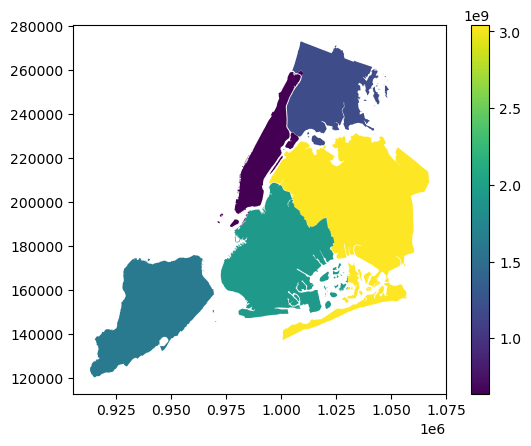

In [27]:
gdf.plot("area", legend=True)

You can also explore your data interactively using `GeoDataFrame.explore()`, which behaves in the same way `plot()` does but returns an interactive map instead.

In [28]:
gdf.explore("area", legend=False)

Switching the active geometry (`GeoDataFrame.set_geometry`) to centroids, we can plot the same data using point geometry.

<AxesSubplot: >

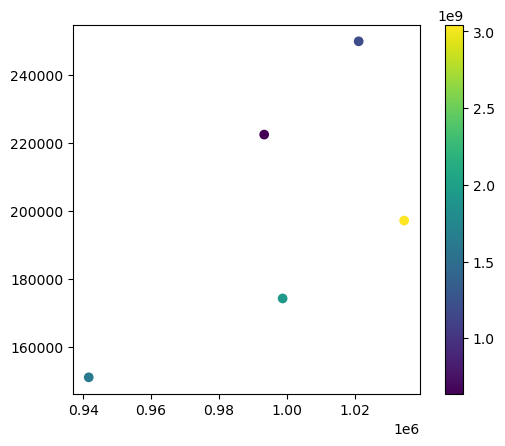

In [29]:
gdf = gdf.set_geometry("centroid")
gdf.plot("area", legend=True)

And we can also layer both `GeoSeries` on top of each other. We just need to use one plot as an axis for the other.

<AxesSubplot: >

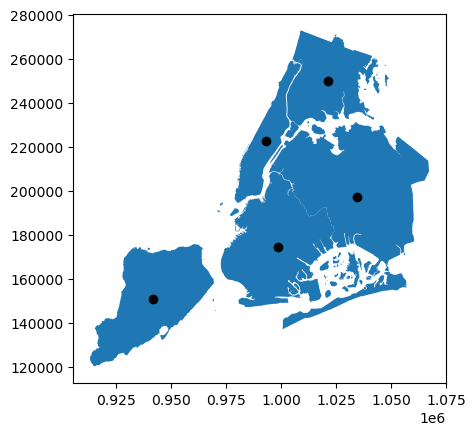

In [30]:
ax = gdf["geometry"].plot()
gdf["centroid"].plot(ax=ax, color="black")

Now we set the active geometry back to the original `GeoSeries`.

In [31]:
gdf = gdf.set_geometry("geometry")

<div class="alert alert-info">
User guide
    
See more on [mapping](../docs/user_guide/mapping.rst) in the user guide.
</div>

## Geometry creation

We can further work with the geometry and create new shapes based on those we already have. 

### Convex hull

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20231218123325/Convex-Hull.jpg' style="height:50%; width:40%;">

If we are interested in the convex hull of our polygons, we can access `GeoDataFrame.convex_hull`.

In [32]:
gdf["convex_hull"] = gdf.convex_hull

<AxesSubplot: >

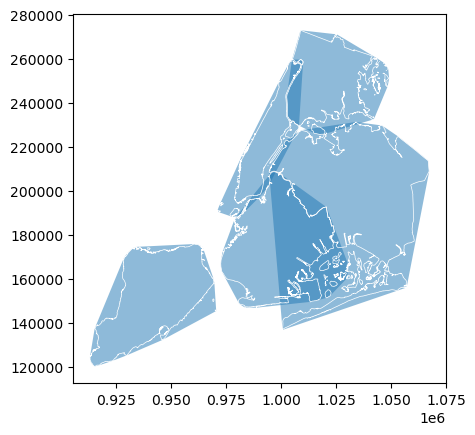

In [33]:
# saving the first plot as an axis and setting alpha (transparency) to 0.5
ax = gdf["convex_hull"].plot(alpha=0.5)
# passing the first plot and setting linewidth to 0.5
gdf["boundary"].plot(ax=ax, color="white", linewidth=0.5)

A practical example of this might be: say you have the locations of different nesting birds in an area. You might take the convex hull of the birds' locations and consider that area to be a nesting ground.

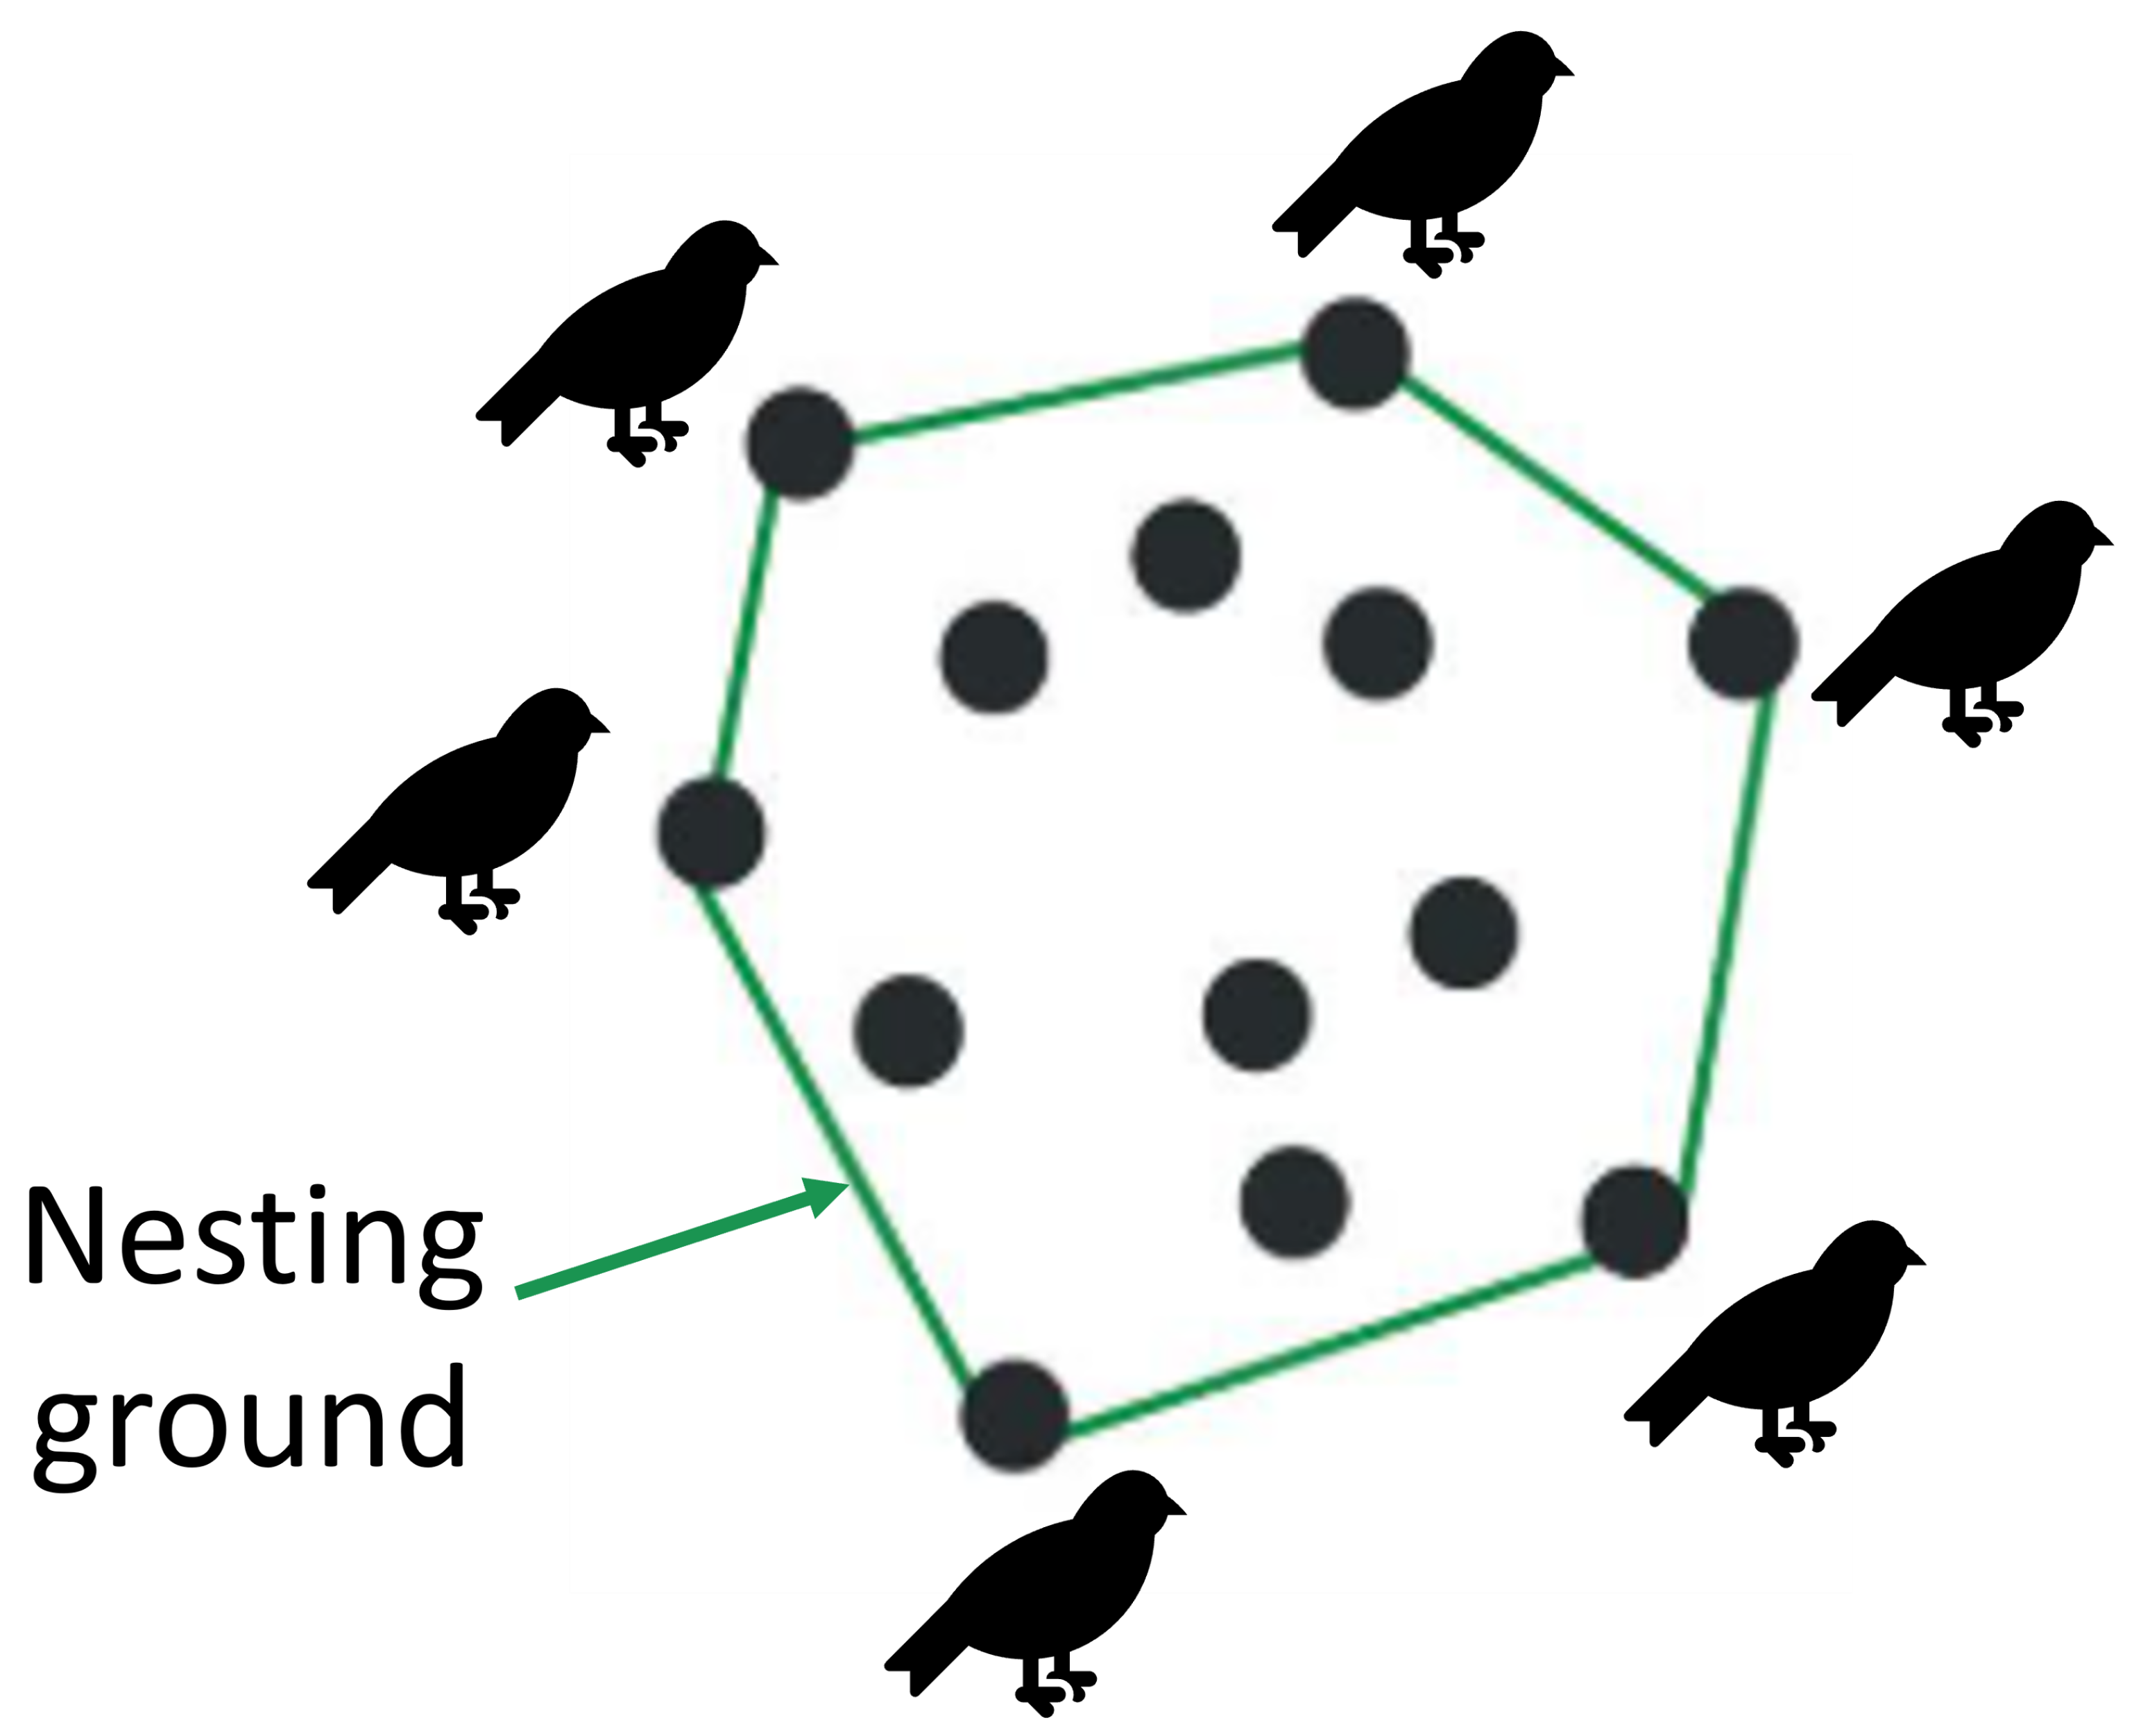

In [9]:
display(Image(filename='Geospatial Analysis in Python/figures/bird_nest.png',width=300))

### Buffer

In other cases, we may need to buffer the geometry using `GeoDataFrame.buffer()`. Geometry methods are automatically applied to the active geometry, but we can apply them directly to any `GeoSeries` as well. Let's buffer the boroughs and their centroids and plot both on top of each other.

In [64]:
# buffering the active geometry by 10 000 feet (geometry is already in feet)
gdf["buffered"] = gdf.buffer(10000)

# buffering the centroid geometry by 10 000 feet (geometry is already in feet)
gdf["buffered_centroid"] = gdf["centroid"].buffer(10000)

<AxesSubplot: >

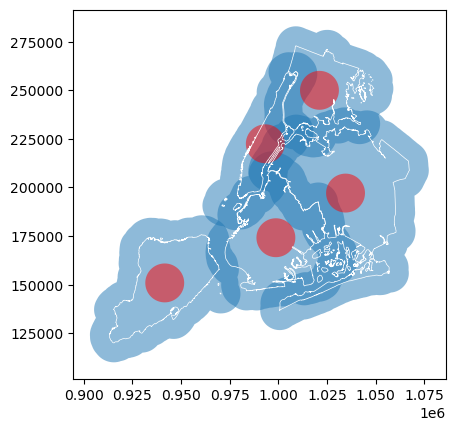

In [35]:
# saving the first plot as an axis and setting alpha (transparency) to 0.5
ax = gdf["buffered"].plot(alpha=0.5)
# passing the first plot as an axis to the second
gdf["buffered_centroid"].plot(ax=ax, color="red", alpha=0.5)
# passing the first plot and setting linewidth to 0.5
gdf["boundary"].plot(ax=ax, color="white", linewidth=0.5)

A more practical example of this might be: say you are investigating cholera cases that you suspect are coming from infected wells. It might be useful to look at how many cholera cases fall within a certain distance of that well:

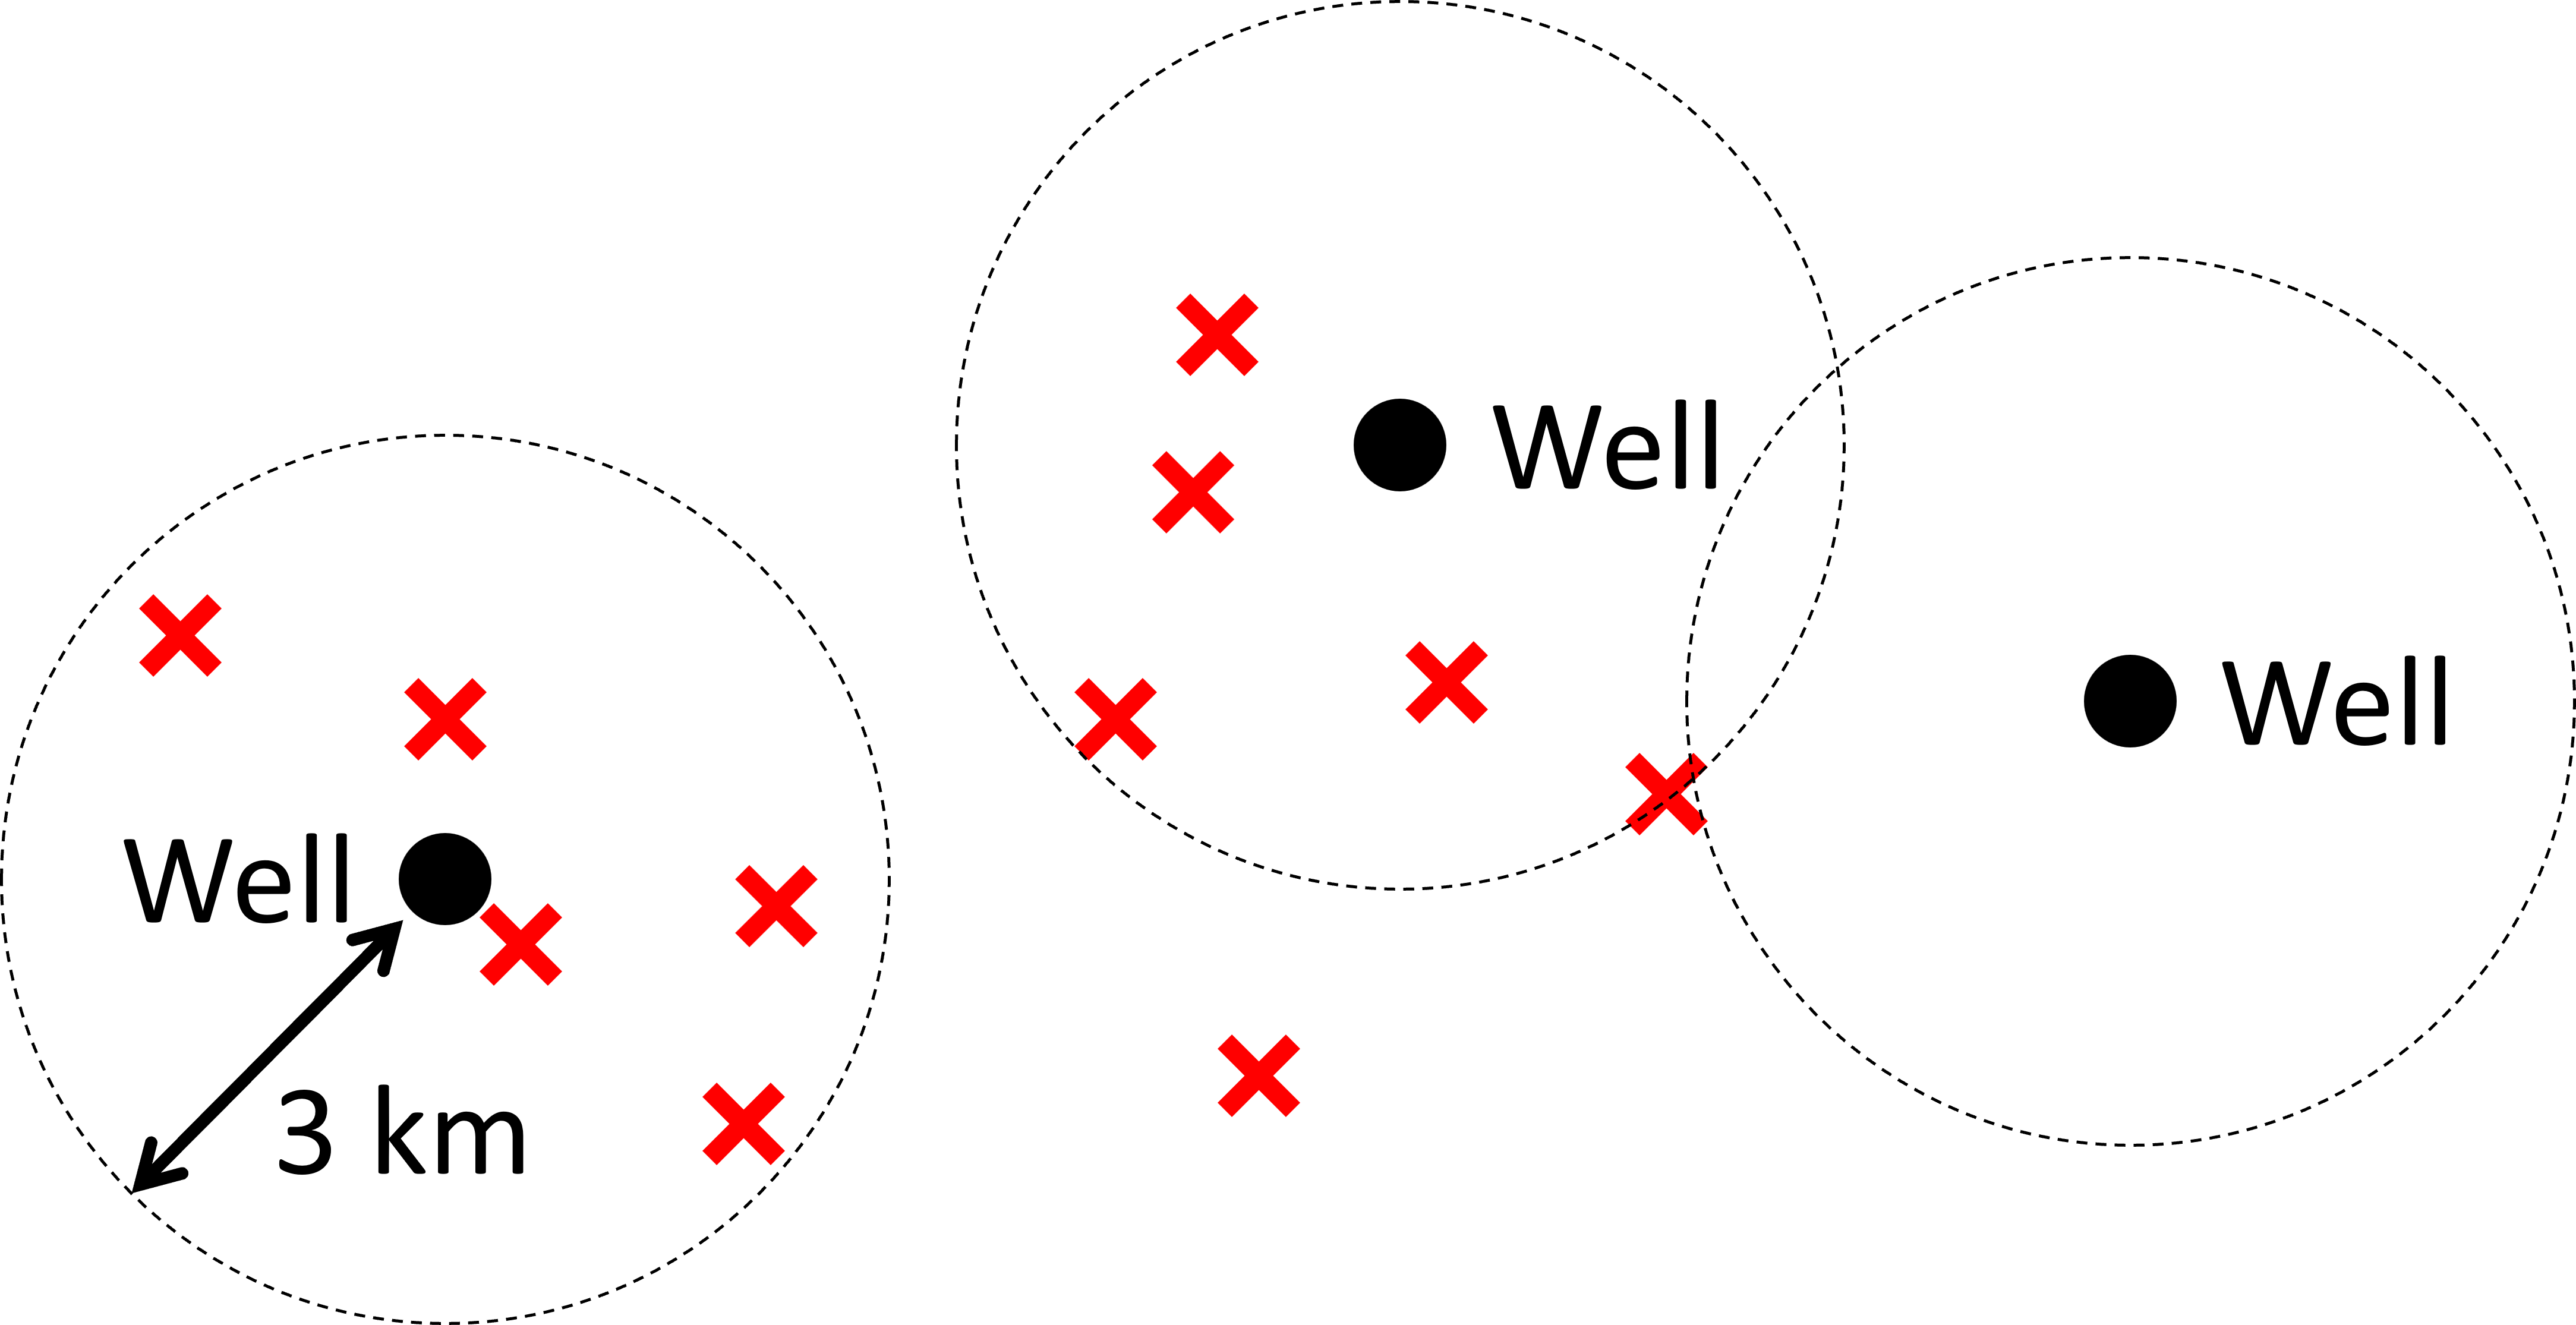

In [7]:
display(Image(filename='Geospatial Analysis in Python/figures/wells.png',width=500))

<div class="alert alert-info">
User guide
    
See more on [geometry manipulations](../docs/user_guide/geometric_manipulations.rst) in the user guide.
</div>

## Geometry relations

We can also ask about the spatial relations of different geometries.

For example, using the geometries above, we can check **which of the buffered boroughs <u>intersect</u> the original geometry of Brooklyn** - i.e., is within 10 000 feet from Brooklyn.

So in this case, our operation looks like this...
<img src=https://geopandas.org/en/stable/_images/binary_op-03.svg>
...where the **<font color='green'> data on the left </font>** represents the buffered burroughs, and the **<font color='pink'>Shapely geometry on the right</font>** represents Brooklyn.

First, we get a polygon of Brooklyn.

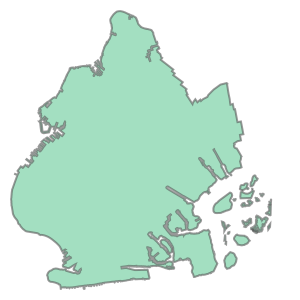

In [65]:
brooklyn = gdf.loc["Brooklyn", "geometry"]
brooklyn

The polygon is a [shapely geometry object](https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects), as any other geometry used in GeoPandas.

Note that **the input to these geometry relation functions must be a Shapely object**.

In [66]:
type(brooklyn)

shapely.geometry.multipolygon.MultiPolygon

Then we can check which of the geometries in `gdf["buffered"]` intersects it.

In [67]:
gdf["buffered"].intersects(brooklyn)

BoroName
Staten Island     True
Queens            True
Brooklyn          True
Manhattan         True
Bronx            False
dtype: bool

Only Bronx (on the north) is more than 10 000 feet away from Brooklyn. All the others are closer and intersect our polygon.

Alternatively, we can check which buffered centroids are entirely within the original boroughs polygons. In this case, both `GeoSeries` are aligned, and the check is performed for each row.

In [ ]:
gdf["within"] = gdf["buffered_centroid"].within(gdf)
gdf["within"]

We can plot the results on the map to confirm the finding.

In [ ]:
gdf = gdf.set_geometry("buffered_centroid")
# using categorical plot and setting the position of the legend
ax = gdf.plot(
    "within", legend=True, categorical=True, legend_kwds={"loc": "upper left"}
)
# passing the first plot and setting linewidth to 0.5
gdf["boundary"].plot(ax=ax, color="black", linewidth=0.5)

### Spatial Joins

Another very useful function for determining the spatial relations of multiple objects in a GeoDataFrame at once is the **spatial join function**, or [`.sjoin()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html). **The purpose of spatial joins** is generally to **combine the attributes of multiple layers** (i.e., GeoDataFrames).
<img src='https://pythongis.org/_images/spatial-join-basic-idea.png' style="height:100%; width:60%;">

It is also very useful for **determining the spatial relations between everything between two GeoDataFrames**.

For example, say we had another GeoDataFrame containing Point geometries of different **restaurant locations** in the New York Boroughs, and we wanted to **_determine which borough each restaurant was in_**:

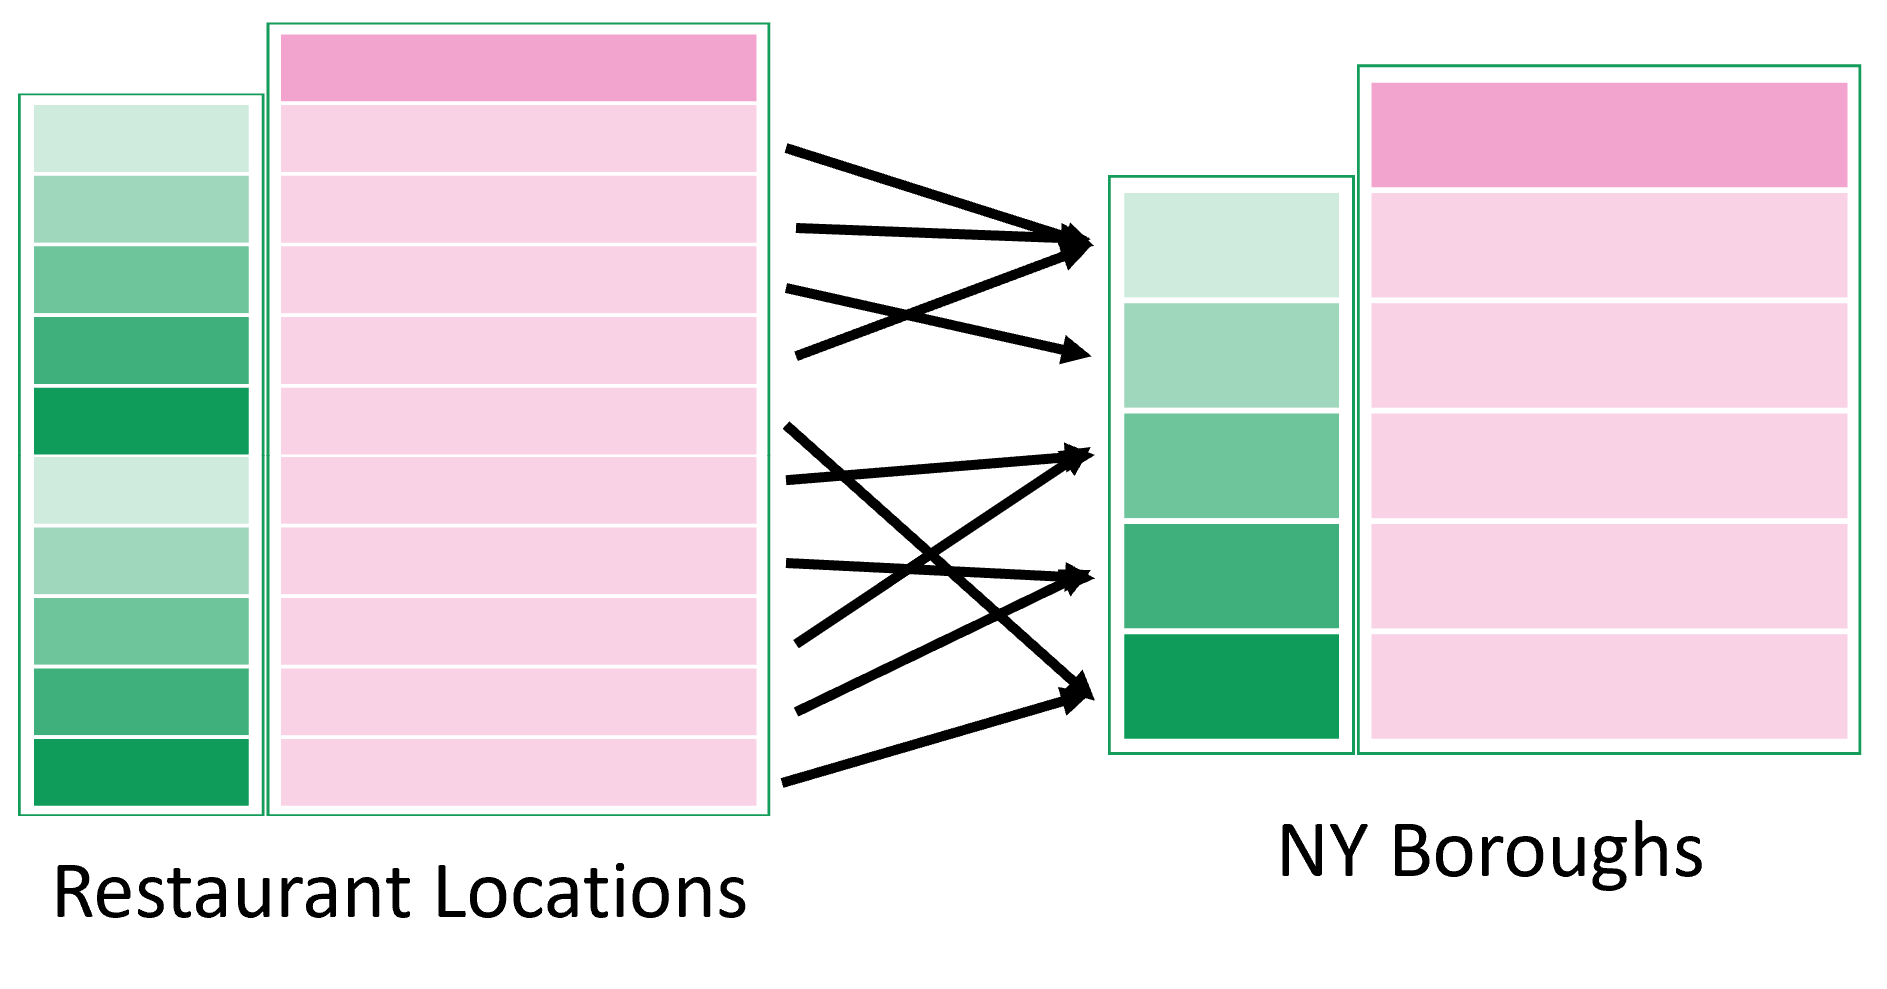

In [6]:
display(Image(filename='Geospatial Analysis in Python/figures/restaurant.png',width=500))

With just a single line of code, you could do this computation!

`gpd.sjoin(nybb_gdf,rst_gdf,predicate='within')`

In the practical below, we will cover how to use this function.

## Projections

Each `GeoSeries` has its Coordinate Reference System (CRS) accessible at `GeoSeries.crs`. The CRS tells GeoPandas where the coordinates of the geometries are located on the earth's surface. In some cases, the CRS is geographic, which means that the coordinates are in latitude and longitude. In those cases, its CRS is WGS84, with the authority code `EPSG:4326`. Let's see the projection of our NY boroughs `GeoDataFrame`.

In [ ]:
gdf.crs

Geometries are in `EPSG:2263` with coordinates in feet. We can easily re-project a `GeoSeries` to another CRS, like `EPSG:4326` using `GeoSeries.to_crs()`.

In [ ]:
gdf = gdf.set_geometry("geometry")
boroughs_4326 = gdf.to_crs("EPSG:4326")
boroughs_4326.plot()

In [ ]:
boroughs_4326.crs

Notice the difference in coordinates along the axes of the plot. Where we had 120 000 - 280 000 (feet) before, we now have 40.5 - 40.9 (degrees). In this case, `boroughs_4326` has a `"geometry"` column in WGS84 but all the other (with centroids etc.) remain in the original CRS.

<div class="alert alert-warning">
Warning
    
For operations that rely on distance or area, you always need to use a projected CRS (in meters, feet, kilometers etc.) not a geographic one (in degrees). GeoPandas operations are planar, whereas degrees reflect the position on a sphere. Therefore, spatial operations using degrees may not yield correct results. For example, the result of `gdf.area.sum()` (projected CRS) is 8 429 911 572 ft<sup>2</sup> but the result of `boroughs_4326.area.sum()` (geographic CRS) is 0.083.
</div>

<div class="alert alert-info">
User guide
    
See more on [projections](../docs/user_guide/projections.rst) in the user guide.
</div>

## What next?

With GeoPandas we can do much more than what has been introduced so far, from [aggregations](../docs/user_guide/aggregation_with_dissolve.rst), to [spatial joins](../docs/user_guide/mergingdata.rst), to [geocoding](../docs/user_guide/geocoding.rst), and [much more](../gallery/index.rst).

Head over to the [user guide](../docs/user_guide.rst) to learn more about the different features of GeoPandas, the [Examples](../gallery/index.rst) to see how they can be used, or to the [API reference](../docs/reference.rst) for the details.

# DEMO and Practical: Wildfires in Brazil in 2024

In this demo, we are going to the spatial and temporal trends of wildfire activity in Brazil. The goal of this analysis is to do the following:
1) **Create a map** that shows **how much area**, in hectares, is burned by wildfires in **each state of Brazil**. This is called a **choropleth**.
    
Your output figure should look something like this:

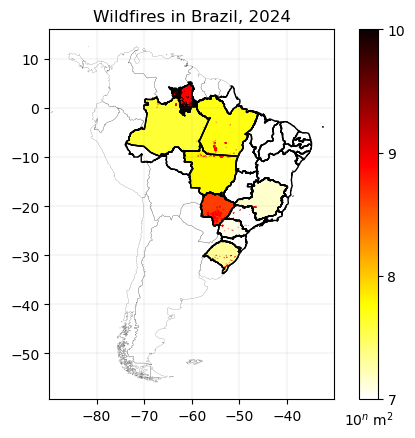

In [15]:
display(Image(filename='Geospatial Analysis in Python/figures/Brazil_WF_final_figure.png'))

The second part of this exercise will be a practical, where you can practice applying some of these concepts yourself.

2) **Output a dataset (CSV)** that tells us **how many fires occur within a 200 km radius** of the **major cities of Brazil**.

## Concepts Covered
* Data filtering, cleaning, and extraction
* Reprojection
* Spatial joins
* Buffers
* Plotting

# DEMO (Part 1): Choropleth of Total Wildfire Burned Area per Brazilian State

## Data Loading

First, let's first load in the datasets we will be using:
* Brazil administrative boundaries, a shapefile (subsetted from this [source](https://data.humdata.org/dataset/cod-ab-bra))
* Wildfire polygons, a shapefile (subsetted from this [source](https://zenodo.org/records/11400062))
* World country boundaries, a shapefile (subsetted from this [source](https://hub.arcgis.com/datasets/esri::world-countries-generalized/explore))

In [2]:
BR_shp = gpd.read_file('Geospatial Analysis in Python/Brazil_adm_shp/bra_admbnda_adm1_ibge_2020.shp')
BR_shp.set_index('ADM1_PT',inplace=True)
WF_shp = gpd.read_file('Geospatial Analysis in Python/BRA_WF_perimeters/BRA_WF.shp')
world_shp = gpd.read_file('Geospatial Analysis in Python/World_Countries/World_Countries_Generalized.shp')
world_shp.set_index('COUNTRY',inplace=True)

## Check CRS

The first step in any geospatial analysis is to **make sure all of your data** are in the **same projection**. What are the CRS of `BR_shp`, `WF_shp`, and `world_shp`?

Let's check the projections of each of our files using the `.crs` attribute:

In [3]:
# BR_shp crs here
BR_shp.crs

In [4]:
# Wildfire shapefile crs here
WF_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
# World countries 
world_shp.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Quick Plot your data
As we saw above, GeoPandas provides a quick and easy plotting interface that you can use to visualize your data quickly. Let's use the `.plot()` method to take a quick look at each of the datasets that we loaded in as GeoDataFrames:

<AxesSubplot: >

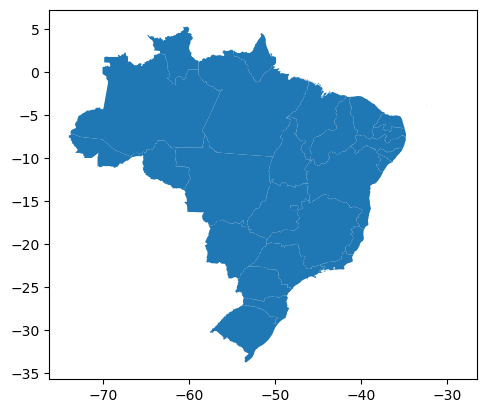

In [9]:
BR_shp.plot()

<AxesSubplot: >

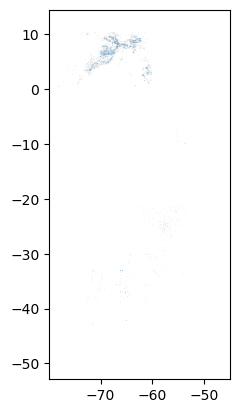

In [10]:
WF_shp.plot()

<AxesSubplot: >

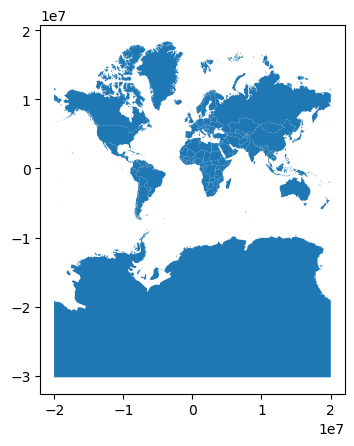

In [11]:
world_shp.plot()

## Convert CRS

From the visualization above, we can see from the axes that `world_shp` is in a different projection.

In this next step, we will **convert the CRS of our data to the same projection**.

In this case, **let's use the classic geographic projection, EPSG:4326**, since it is intuitive to look at the results in degrees latitude/longitude.

In [34]:
# Convert world_shp here
world_shp.to_crs('EPSG:4326',inplace=True)

Note: the `inplace=True` argument simply tells Python to modify `world_shp` in place; this means that the method (`.to_crs()`) will operate on the variable (`world_shp`) itself.

### Setting a CRS
From above, it looks like `BR_shp` does have a CRS set, which is why there was no output when you ran the code `BR_shp.crs`. In this case, **instead of _changing_** the CRS, we will need to **first _set_ the CRS**.

The CRS should come from the data source; you can generally find CRS info published on the website where the data was downloaded from.

In this case, **this shapefile has a projection of EPSG:4674**, so let's set it to that:

In [5]:
# Set BR_shp here
BR_shp.crs = 'EPSG:4674'

Only after we **_set_** the CRS can we convert it to the CRS we want. So now we can convert `BR_shp` from **EPSG:4674 to EPSG:4326**.

In [6]:
# Convert BR_shp here
BR_shp.to_crs('EPSG:4326',inplace=True)

## Initial Data Visualization

Now that everything's in the same CRS, let's **add everything onto the same figure** and see how it looks. We can make sure that all the CRSs were converted properly and take an exploratory look at our data.

To create this figure, we can still use the `.plot()` method on the GeoDataFrame. However, to make sure all the data goes on the same axes, you need to specify that as a keyword argument.
* Create the **figure and axes handles** using the **`plt.subplots() method`** (you can refer back to the Plotting in Python notebook to remember how to do this).
* Use the `.plot()` method on `world_shp`.
    * Recommended keyword arguments: `facecolor='None',edgecolor='gray',linewidth=0.1`
* Use the `.plot()` method on `BR_shp`.
    * Recommended keyword arguments: `facecolor='None'`
* Use the `.plot()` method on `WF_shp`.
    * Recommended keyword arguments: `facecolor='red',edgecolor='red'`

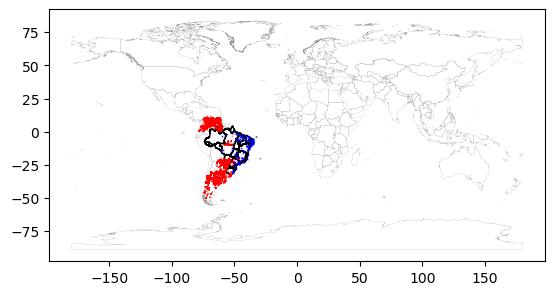

In [20]:
# Create the figure and axes 
fig,ax = plt.subplots()

# Plot the world map shapefile
world_shp.plot(facecolor='None',edgecolor='gray',linewidth=0.1,ax=ax)

# Plot the Brazil states shapefile
BR_shp.plot(facecolor='None',ax=ax)

# Plot the wildfire data
WF_shp.plot(facecolor='red',edgecolor='red',ax=ax)

# Plot the Brazilian cities file
ax.scatter(BR_cities['lng'],BR_cities['lat'],marker='x',color='blue',s=0.1)

## Data Processing and Cleaning
After doing a quick visualization of our data, you might notice a few things that we can improve:
* Cut out countries that aren't in South America
* Filter out wildfires that don't touch Brazil

### Cutting by Coordinates
GeoDataFrames have a super useful function, **[`.cx[]`](https://geopandas.org/en/latest/docs/reference/api/geopandas.GeoDataFrame.cx.html)**, that allows you to **select items in your dataset that fall within certain coordinates**.

Look at the documentation linked above to see how it works. Then, **cut `world_shp`** so that it only plots the **countries between -100 and -40 degrees longitude (x)**, and **-60 and 10 degrees latitude (y)**.

<AxesSubplot: >

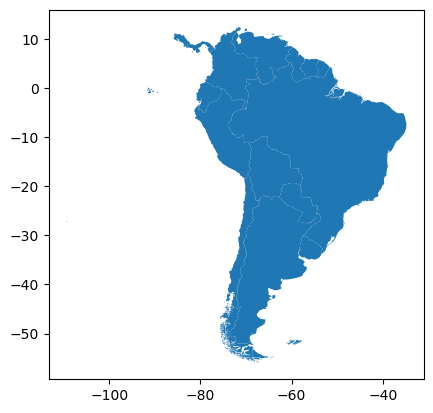

In [35]:
SAM_shp = world_shp.cx[-100:-40,-60:10]
SAM_shp.plot()

### Filtering for Datapoints Within a Shape
Recall the two geospatial relations methods from the examples above on the New York burroughs: `.within()` and `.intersects()`. In this section, we're going to use one of these methods to accomplish this.

In this case, we want to check **all the records in `WF_shp`**, and see which of them fall within the **country borders of Brazil**.

<img src=https://geopandas.org/en/stable/_images/binary_op-03.svg>

Remember that in order to do spatial relations, we must perform the operation on a **Shapely object**. You can tell if you have correctly extracted the Shapely object because it will return, well, a shape!

In [ ]:
brazil_outline = SAM_shp.loc['Brazil','geometry']

In [37]:
# Create a variable that stores the boolean index for whether the wildfires are in Brazil,
## i.e., a 18000x1 array that is True when the wildfire is in Brazil, and False when it is not
idx = WF_shp.within(brazil_outline)

# Apply that boolean index to filter out only the wildfires in Brazil, and
## save this as a new variable called BR_WF_shp
### BR_WF_shp should have 1454 wildfire records.
BR_WF_shp = WF_shp[idx]

## Data Analysis and Formatting to Plot

### Spatial Join: Determining which datapoints fall within a set of geometries

In this case, we would like to determine which wildfires (the datapoints) fall within each state of Brazil (the set of geometries).

Recall that we can use the **`gpd.sjoin()`** function to do this. Let's take a look at what it outputs:

In [17]:
WF_BR_sjoin = gpd.sjoin(WF_shp,BR_shp)
WF_BR_sjoin

fire_ID     lat      lon  size  perimeter  start_date  start_DOY  \
14573    20925  5.0438 -60.6160  1.71      11.11  2023-12-03        337   
14783    21138  4.8771 -60.6718  3.64       8.33  2023-11-22        326   
14995    21343  4.6646 -60.5402  0.43       2.78  2023-09-11        254   
15060    21410  4.5855 -60.6546  0.21       1.85  2023-11-24        328   
15064    21412  4.5813 -60.3199  1.93       5.56  2023-10-15        288   
...        ...     ...      ...   ...        ...         ...        ...   
16896    22756 -9.9687 -53.7173  3.86      10.19  2024-02-03         34   
16897    22759 -9.9812 -52.4121  0.21       1.85  2024-02-12         43   
16898    22760 -9.9812 -52.2555  0.86       3.70  2024-02-29         60   
16899    22758 -9.9812 -53.7024  1.50       6.48  2024-02-04         35   
16900    22757 -9.9937 -53.6834  5.14      12.96  2024-02-03         34   

         end_date  end_DOY  duration  ...  MODIS_tile     landcover  \
14573  2023-12-10      344         8  ...      h11v08  Unclassified   
14783  2023-11-27      331         6  ...      h11v08  Unclassified   
14995  2023-09-12      255         2  ...      h11v08  Unclassified   
15060  2023-11-24      328         1  ...      h11v08  Unclassified   
15064  2023-10-16      289         2  ...      h11v08  Unclassified   
...           ...      ...       ...  ...         ...           ...   
16896  2024-02-15       46        13  ...      h12v09  Unclassified   
16897  2024-02-12       43         1  ...      h12v09  Unclassified   
16898  2024-02-29       60         1  ...      h12v09  Unclassified   
16899  2024-02-13       44        10  ...      h12v09  Unclassified   
16900  2024-02-16       47        14  ...      h12v09  Unclassified   

       landc_frac GFED_regio  \
14573         1.0          4   
14783         1.0          4   
14995         1.0          4   
15060         1.0          4   
15064         1.0          4   
...           ...        ...   
16896         1.0          5   
16897         1.0          5   
16898         1.0          5   
16899         1.0          5   
16900         1.0          5   

                                                geometry  index_right ADM0_EN  \
14573  POLYGON ((-60.63158 5.05417, -60.62739 5.05417...      Roraima  Brazil   
14783  POLYGON ((-60.67403 4.87917, -60.65312 4.87917...      Roraima  Brazil   
14995  POLYGON ((-60.54237 4.66667, -60.53401 4.66667...      Roraima  Brazil   
15060  POLYGON ((-60.65682 4.58750, -60.65264 4.58750...      Roraima  Brazil   
15064  POLYGON ((-60.32207 4.58333, -60.30953 4.58333...      Roraima  Brazil   
...                                                  ...          ...     ...   
16896  POLYGON ((-53.72326 -9.96667, -53.71480 -9.966...  Mato Grosso  Brazil   
16897  POLYGON ((-52.41381 -9.97917, -52.40958 -9.979...  Mato Grosso  Brazil   
16898  POLYGON ((-52.25728 -9.97917, -52.24881 -9.979...  Mato Grosso  Brazil   
16899  POLYGON ((-53.69925 -9.97500, -53.69502 -9.975...  Mato Grosso  Brazil   
16900  POLYGON ((-53.69147 -9.97917, -53.68301 -9.979...  Mato Grosso  Brazil   

       ADM0_PT  ADM0_PCODE ADM1_PCODE  
14573   Brasil          BR       BR14  
14783   Brasil          BR       BR14  
14995   Brasil          BR       BR14  
15060   Brasil          BR       BR14  
15064   Brasil          BR       BR14  
...        ...         ...        ...  
16896   Brasil          BR       BR51  
16897   Brasil          BR       BR51  
16898   Brasil          BR       BR51  
16899   Brasil          BR       BR51  
16900   Brasil          BR       BR51  

[1463 rows x 25 columns]

The **key output we want to use here is in the column `index_right`**.

This column essentially maps everything in the left GeoDataFrame (the wildfires) to the right GeoDataFrame (the states of Brazil).

So each row in this column tells us the **index of the Brazilian state** that that row's wildfire falls into:

In [18]:
WF_BR_sjoin['index_right']

14573        Roraima
14783        Roraima
14995        Roraima
15060        Roraima
15064        Roraima
            ...     
16896    Mato Grosso
16897    Mato Grosso
16898    Mato Grosso
16899    Mato Grosso
16900    Mato Grosso
Name: index_right, Length: 1463, dtype: object

Recall that our goal is to create a map that tells us how much area is burned in each state of Brazil. In our next step, we will use the GeoDataFrame property `.area` to get this information.

However, note that if you are using a CRS whose units are **degrees**, you will first have to **convert to a non-geographic CRS (which have units of meters, feet, km, etc)** before you can carry out this operation. If you forget, no worries - GeoPandas will issue you a warning if you don't do this, and the results in degrees won't make a lot of sense anyway.

In [20]:
WF_BR_sjoin.area

C:\Users\alice\AppData\Local\Temp\ipykernel_33764\2062948267.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  WF_BR_sjoin.area


14573    0.000139
14783    0.000296
14995    0.000035
15060    0.000017
15064    0.000157
           ...   
16896    0.000317
16897    0.000018
16898    0.000071
16899    0.000123
16900    0.000423
Length: 1463, dtype: float64

We will reproject to a **projected CRS called EPSG 5880**, which is used specifically for Brazil, and has units of **meters**. Our resulting area calculation with thus be in units of m$^{2}$.

In [23]:
WF_BR_sjoin.to_crs('EPSG:5880').area

14573    1.721188e+06
14783    3.657803e+06
14995    4.302191e+05
15060    2.151593e+05
15064    1.935144e+06
             ...     
16896    3.848180e+06
16897    2.138653e+05
16898    8.555285e+05
16899    1.496545e+06
16900    5.130944e+06
Length: 1463, dtype: float64

_**A quick note about this line of code**: note that we didn't specify `inplace=True` when we converted the CRS. This means that `WF_BR_sjoin`'s CRS has not changed (i.e., it is still EPSG:4326), and the code above simply returns a <u>copy</u> of `WF_BR_sjoin` without actually modifying it._

Let's save this output as a new column in `WF_BR_sjoin`:

In [24]:
WF_BR_sjoin['WF_Area_m2'] = WF_BR_sjoin.to_crs('EPSG:5880').area

### Data Calculations

Now, let's recap the information we have and the information we need. We currently have:
* The area of every wildfire in Brazil, in m$^2$
* The Brazilian state of every wildfire, i.e., what state it is in.
We now need to calculate the **total wildfire area burned, for _each state_.**

For this we will use the Pandas function `groupby()`, followed by `.sum()`.
* `groupby()` allows you to group entries in your DataFrame by **unique number of things in a column**. For example, say for every record you have a the month that it occurred in, stored in a column called `Month`. Calling the `groupby()` function on this column (`gdf.groupby('Month')`) would then group all the entries by the different months in the dataset.

* The `.sum()` that is called after the `groupby()` will then sum everything by group. For example, if you called `.sum()` on the `Month` groups (`gdf.groupby('Month').sum()`), then this would return the sum of every numeric column for each month in the `Month` column, including the total area burned in each month.

    * You can call a range of mathematical operations on a GroupBy object. For example, if you wanted the _average_ area burned in each month, you could just write `gdf.groupby('Month').mean()`.

In [27]:
WF_BR_sjoin.groupby('index_right').sum(numeric_only=True)

fire_ID        lat         lon     size  perimeter  \
index_right                                                               
Amazonas              610262     4.6494  -1740.3671    81.20     199.09   
Mato Grosso          1431927  -616.6368  -3445.9149   112.91     367.56   
Mato Grosso do Sul   4466298 -4257.7609 -10705.9799   460.74    1375.07   
Minas Gerais          321776  -262.5806   -608.0736    38.81     111.11   
Paraná                471020  -454.0052   -993.1046    33.21     113.89   
Pará                 1631620  -566.2836  -3938.7087    97.87     400.88   
Rio Grande do Sul    1367963 -1744.8453  -2930.1237    50.36     235.24   
Roraima             22254956  3048.2112 -61489.2266  4484.08    9378.14   
São Paulo             272504  -246.7972   -548.7849    29.99      75.92   

                    start_DOY  end_DOY  duration  fire_line  spread   speed  \
index_right                                                                   
Amazonas                 2802     2590       180      16.48    7.69   16.80   
Mato Grosso              2544     2845       364      40.98   19.41   46.87   
Mato Grosso do Sul       8263     9266      1197     166.12   78.81  151.74   
Minas Gerais              589      634        58      26.48   14.40   14.66   
Paraná                    813      899       105      12.96    6.10   11.87   
Pará                     2841     3106       337      56.53   27.04   48.78   
Rio Grande do Sul        8531     8322       211      37.25   17.31   30.95   
Roraima                151869   151472      5722    1144.43  595.41  866.56   
São Paulo                 485      530        56      13.24    7.70    8.34   

                    direc_frac  landc_frac  GFED_regio    WF_Area_m2  
index_right                                                           
Amazonas                  7.98        27.0         110  8.210699e+07  
Mato Grosso              22.15        63.0         315  1.127043e+08  
Mato Grosso do Sul       70.60       194.0         970  4.604407e+08  
Minas Gerais              2.61        13.0          65  3.901371e+07  
Paraná                    4.39        19.0          95  3.322013e+07  
Pará                     20.09        72.0         360  9.771344e+07  
Rio Grande do Sul        22.93        55.0         275  5.042195e+07  
Roraima                 309.99      1009.0        4036  4.505788e+09  
São Paulo                 2.66        11.0          55  3.001781e+07

The **`WF_Area_m2` column** now contains the **total wildfire area burned in each Brazilian state**, which is exactly what we needed. However, note that **this output is now just a plain DataFrame** (which you can tell because there's **no geometry column**).

Thus, we need to **add this wildfire burned area data** back to the **GeoDataFrame containing the Brazilian states, `BR_shp`**.

Wildfire areas are typically visualized on a log scale because they can vary across large orders of magnitude, so we'll also take the base 10 log of the data before we add it to `BR_shp`:

In [41]:
BR_shp['log10_Tot_WF_Area_m2'] = np.log10(WF_BR_sjoin.groupby('index_right').sum(numeric_only=True)['WF_Area_m2'])

Let's just do a quick visualization to make sure this looks right.

GeoPandas' built in plot function takes a **`column` keyword argument - this is the key to making the choropleth**.

<AxesSubplot: >

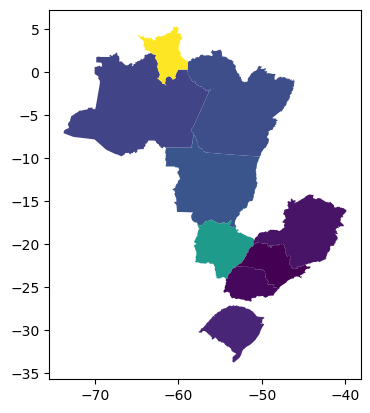

In [43]:
BR_shp.plot(column='log10_Tot_WF_Area_m2')

Now let's put all the map pieces together to make this choropleth. The parts we need are:
* South America, in a lighter outline (`SAM_shp`)
* Brazil and its states, in bolder outline (`BR_shp`)
* Brazil and its states, colored in by the log of their total wildfire area burned (`BR_shp`)
* The wildfire perimeters in Brazil (`BR_WF_shp`)

We will have to tweak the appearances of the different layers to make it look more readable.

C:\Users\alice\AppData\Local\Temp\ipykernel_33764\2535538233.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


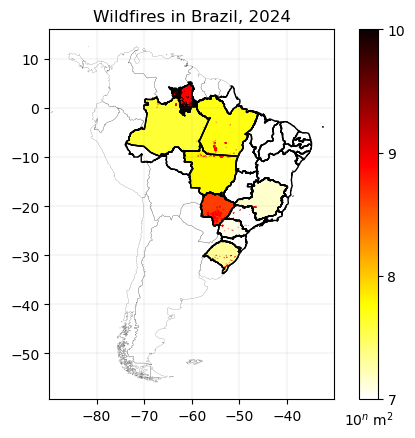

In [78]:
fig,ax = plt.subplots()
SAM_shp.plot(facecolor='None',linewidth=0.1,ax=ax)
cm = BR_shp.plot(column='log10_Tot_WF_Area_m2',ax=ax,cmap='hot_r',linewidth=1,edgecolor='black')
BR_WF_shp.plot(facecolor='red',edgecolor='red',ax=ax)
BR_shp.plot(facecolor='None',linewidth=1,ax=ax,alpha=1)

# Customize colorbar
sm = plt.cm.ScalarMappable(cmap='hot_r',norm=plt.Normalize(vmin=7,vmax=10))
cbar = fig.colorbar(sm)
cbar.ax.set_yticks([7,8,9,10])
cbar.ax.set_xlabel('10$^n$ m$^2$')

# Customize other axes settings
ax.set_title('Wildfires in Brazil, 2024')
ax.grid(visible=True,linewidth=0.1,color='gray')
ax.set_xlim([-90,-30]);
ax.set_xticks([-80,-70,-60,-50,-40]);

# Practical (Part 2): Fire Count within 200km for Brazilian Cities

In [86]:
BR_cities_df = pd.read_csv('Geospatial Analysis in Python/brazil_cities.csv')
BR_shp = gpd.read_file('Geospatial Analysis in Python/Brazil_adm_shp/bra_admbnda_adm1_ibge_2020.shp')
BR_shp.set_index('ADM1_PT',inplace=True)
WF_shp = gpd.read_file('Geospatial Analysis in Python/BRA_WF_perimeters/BRA_WF.shp')
world_shp = gpd.read_file('Geospatial Analysis in Python/World_Countries/World_Countries_Generalized.shp')

## Convert a CSV from a Pandas DataFrame to a GeoDataFrame

Sometimes when working with geospatial data, you will have a **CSV containing geospatial information** (e.g., coordinates). In order to be able to perform geospatial operations on it, **you will need to be convert it into a GeoDataFrame**.

In [80]:
BR_cities_df

city      lat      lng country iso2           admin_name  \
0         São Paulo -23.5500 -46.6333  Brazil   BR            São Paulo   
1    Rio de Janeiro -22.9111 -43.2056  Brazil   BR       Rio de Janeiro   
2    Belo Horizonte -19.9167 -43.9333  Brazil   BR         Minas Gerais   
3         Fortaleza  -3.7275 -38.5275  Brazil   BR                Ceará   
4          Brasília -15.7939 -47.8828  Brazil   BR     Distrito Federal   
..              ...      ...      ...     ...  ...                  ...   
141         Equador  -6.9465 -36.7174  Brazil   BR  Rio Grande do Norte   
142          Viçosa  -9.3720 -36.2441  Brazil   BR              Alagoas   
143         Santana  -3.1444 -44.3247  Brazil   BR             Maranhão   
144          Iguaba -10.2835 -37.9260  Brazil   BR                Bahia   
145        Canarana -13.5527 -52.2663  Brazil   BR          Mato Grosso   

     capital  population  population_proper  
0      admin  23086000.0         12252023.0  
1      admin  12592000.0          6520000.0  
2      admin   5328000.0          2502557.0  
3      admin   4167996.0          2703391.0  
4    primary   2817068.0          2817068.0  
..       ...         ...                ...  
141    minor         NaN                NaN  
142    minor         NaN                NaN  
143    minor         NaN                NaN  
144    minor         NaN                NaN  
145    minor         NaN                NaN  

[146 rows x 9 columns]

To convert the **CSV into a GeoDataframe**, you must **create and assign it a geometry**. Recall that **geometries are made out of Shapely objects** - either Points, Lines, or Polygons.

Since the cities are represented as a **single point in the CSV**, we will use the **Shapely `Point()` object to create the geometry**.

In [156]:
BR_cities_gdf = gpd.GeoDataFrame({'city':BR_cities_df['city'],
                                  'geometry':[Point(xy) for xy in zip(BR_cities['lng'],BR_cities['lat'])]},
                                    crs='EPSG:4326')
BR_cities_gdf.set_index('city',inplace=True)

## Create a Buffer

Now that we have turned our Brazilian cities data into a GeoDataFrame, we are ready to do geospatial operations on it!

The first thing we want to do is **create a 200 km buffer around each city** in our dataset.

Note that you must **first convert to a CRS that has units of meters or kilometers** (i.e., a projected CRS) in order to complete this operation. In this case, we will convert to **EPSG:5880**, which has units of meters.

* **<font color='red'> Write the code below to convert the CRS of `BR_cities_gdf` to EPSG:5880. </font>Don't forget to specify `inplace=True` in the function to make sure the conversion is applied to the original GeoDataFrame.**

In [ ]:
# Convert the CRS of BR_cities_gdf
BR_cities_gdf.to_crs('EPSG:5880',inplace=True)

Now that we have converted to an appropriate CRS, we now need to create the buffer.
* Which geospatial function should we use?
* **<font color='red'> Write the code to create this buffer. It should return a GeoSeries. </font>**

In [157]:
# Create the city buffer
BR_cities_buffer = BR_cities_gdf.buffer(200000)
BR_cities_buffer

city
São Paulo         POLYGON ((5951827.393 7375235.663, 5950864.339...
Rio de Janeiro    POLYGON ((6306400.095 7424715.559, 6305437.040...
Belo Horizonte    POLYGON ((6253374.692 7765322.751, 6252411.637...
Fortaleza         POLYGON ((6918683.180 9572741.533, 6917720.126...
Brasília          POLYGON ((5855325.455 8243641.038, 5854362.400...
                                        ...                        
Equador           POLYGON ((7109437.855 9197025.254, 7108474.801...
Viçosa            POLYGON ((7149539.497 8914403.246, 7148576.443...
Santana           POLYGON ((6275423.384 9647326.031, 6274460.330...
Iguaba            POLYGON ((6960058.102 8818704.382, 6959095.048...
Canarana          POLYGON ((5387653.549 8500477.096, 5386690.495...
Length: 146, dtype: geometry

## Filtering for Datapoints Within a Polygon

Next, we need to **filter for just the wildfires that happened in Brazil**. (Note that we did this exact same operation in Part 1. Feel free to refer to the code up there).
* **<font color='red'> First, extract the geometry of Brazil's country outline from `world_shp` and save it as a variable called `brazil_outline`. </font> You will need the `.loc[]` method to do this.**
* **<font color='red'> Apply the `.within()` function. </font> Your left GeoDataFrame should be `WF_shp`, and your right GeoDataFrame should be `brazil_outline`. Save this output as a variable called `idx`.**
    * Your output, `idx`, should be a 18886x1 that is True when the wildfire is in Brazil, and False when it is not i.e., a boolean index. 

In [196]:
# Create a variable that stores the boolean index for whether the wildfires are in Brazil,
## i.e., a 18886x1 array that is True when the wildfire is in Brazil, and False when it is not
brazil_outline = world_shp.loc['Brazil','geometry']
idx = WF_shp.within(brazil_outline)

Now we need to apply this boolean index to the original wildfires GeoDataFrame, `WF_shp`.
* **<font color='red'>Apply the boolean index to `WF_shp`</font> and save the output as a variable called `BR_WF_shp`.**

In [ ]:
# Apply that boolean index to filter out only the wildfires in Brazil, and
## save this as a new variable called BR_WF_shp
### BR_WF_shp should have 1455 wildfire records.
BR_WF_shp = WF_shp[idx]

## Spatial Joins: Determining which datapoints fall within a set of geometries

### Determine which Wildfire Polygons fall within each City Buffer

Now that we have a GeoDataFrame containing records for just Brazilian wildfires, we must convert it to the same projection as the city buffers so that we can do our geospatial operation.
* **<font color='red'> Write the code below to convert the CRS of `BR_WF_shp` to EPSG:5880. </font> Don't forget to specify `inplace=True` in the function to make sure the conversion is applied to the original GeoDataFrame.**

In [200]:
### YOUR CODE HERE ###
BR_WF_shp.to_crs('EPSG:5880',inplace=True)
BR_WF_shp

C:\Users\alice\anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


fire_ID      lat      lon   size  perimeter  start_date  start_DOY  \
14995    21343   4.6646 -60.5402   0.43       2.78  2023-09-11        254   
15060    21410   4.5855 -60.6546   0.21       1.85  2023-11-24        328   
15064    21412   4.5813 -60.3199   1.93       5.56  2023-10-15        288   
15098    21450   4.5355 -60.8594   3.00       8.33  2024-01-21         21   
15117    21477   4.5146 -60.2056   0.21       1.85  2023-10-08        281   
...        ...      ...      ...    ...        ...         ...        ...   
18162    23201 -23.7812 -55.4112   0.21       1.85  2024-02-27         58   
18163    23202 -23.7520 -55.3851   8.57      37.04  2024-02-29         60   
18164    23205 -23.8062 -55.3125  11.36      19.45  2024-02-03         34   
18165    23206 -23.8145 -55.3115   0.21       1.85  2024-02-04         35   
18166    23208 -23.8145 -54.6876   0.43       2.78  2024-02-18         49   

         end_date  end_DOY  duration  fire_line  spread  speed  direction  \
14995  2023-09-12      255         2       0.46    0.21   0.46       east   
15060  2023-11-24      328         1       0.46    0.21   0.46       none   
15064  2023-10-16      289         2       2.08    0.96   0.69       east   
15098  2024-01-26       26         6       1.08    0.50   0.60      south   
15117  2023-10-08      281         1       0.46    0.21   0.46       none   
...           ...      ...       ...        ...     ...    ...        ...   
18162  2024-02-27       58         1       0.46    0.21   0.46       none   
18163  2024-02-29       60         1      17.13    8.57   5.43       none   
18164  2024-02-17       48        15       1.45    0.76   1.19  northwest   
18165  2024-02-04       35         1       0.46    0.21   0.46       none   
18166  2024-02-18       49         1       0.93    0.43   0.46       none   

       direc_frac MODIS_tile     landcover  landc_frac  GFED_regio  \
14995        1.00     h11v08  Unclassified         1.0           4   
15060        0.00     h11v08  Unclassified         1.0           4   
15064        0.44     h11v08  Unclassified         1.0           4   
15098        0.36     h11v08  Unclassified         1.0           4   
15117        0.00     h11v08  Unclassified         1.0           4   
...           ...        ...           ...         ...         ...   
18162        0.00     h12v11  Unclassified         1.0           5   
18163        0.00     h12v11  Unclassified         1.0           5   
18164        0.23     h12v11  Unclassified         1.0           5   
18165        0.00     h12v11  Unclassified         1.0           5   
18166        0.00     h12v11  Unclassified         1.0           5   

                                                geometry  
14995  POLYGON ((4274115.280 10519396.495, 4275042.92...  
15060  POLYGON ((4261334.665 10510702.419, 4261798.48...  
15064  POLYGON ((4298475.392 10509902.376, 4299866.86...  
15098  POLYGON ((4237169.555 10505361.526, 4239024.83...  
15117  POLYGON ((4311089.826 10502376.501, 4311553.65...  
...                                                  ...  
18162  POLYGON ((4856033.439 7368454.558, 4856497.500...  
18163  POLYGON ((4858659.546 7371711.725, 4860051.730...  
18164  POLYGON ((4864850.622 7368539.522, 4866242.813...  
18165  POLYGON ((4866223.063 7364859.449, 4866687.127...  
18166  POLYGON ((4929801.006 7365307.867, 4930729.164...  

[1455 rows x 20 columns]

We're now almost ready to carry out the spatial join operation. One caveat about the **GeoPandas `sjoin()` function** is that **only takes GeoDataFrames as inputs, not GeoSeries**. `BR_cities_buffer` is a GeoSeries at the moment, so let's just convert it to a GeoDataFrame really quickly.

**<font color='red'>Just run the cell below:</font>**

In [201]:
# Converts GeoSeries to GeoDataFrame
BR_cities_buffer_gdf = gpd.GeoDataFrame(BR_cities_buffer)
# Sets geometry of GeoDataFrame
BR_cities_buffer_gdf.set_geometry(0,inplace=True)

Now we can carry out our spatial join operation. 
* **<font color='red'> Call `gpd.sjoin()` on `BR_WF_shp` (as the left gdf) and `BR_cities_buffer_gdf` (as the right gdf) </font> and save the output as a variable called `cities_WF_sjoin`.**

In [205]:
### YOUR CODE HERE ###
cities_WF_sjoin = gpd.sjoin(BR_WF_shp,BR_cities_buffer_gdf)
cities_WF_sjoin

fire_ID      lat      lon  size  perimeter  start_date  start_DOY  \
16310    24814 -30.0979 -51.7746  1.93       7.41  2023-08-02        214   
16311    24815 -30.0979 -52.7137  0.21       1.85  2024-01-08          8   
16312    24816 -30.1062 -52.7278  0.21       1.85  2024-01-02          2   
16321    24825 -30.3187 -50.9641  2.14       7.41  2024-01-23         23   
16328    24832 -30.4562 -52.6552  0.43       2.78  2023-08-09        221   
...        ...      ...      ...   ...        ...         ...        ...   
16739    24788 -23.9312 -48.0723  0.21       1.85  2024-02-01         32   
16739    24788 -23.9312 -48.0723  0.21       1.85  2024-02-01         32   
16739    24788 -23.9312 -48.0723  0.21       1.85  2024-02-01         32   
16739    24788 -23.9312 -48.0723  0.21       1.85  2024-02-01         32   
16767    22627  -3.8562 -57.5199  0.21       1.85  2024-02-12         43   

         end_date  end_DOY  duration  ...  spread  speed  direction  \
16310  2023-08-23      235        22  ...    0.09   0.91  northeast   
16311  2024-01-08        8         1  ...    0.21   0.46       none   
16312  2024-01-02        2         1  ...    0.21   0.46       none   
16321  2024-01-28       28         6  ...    0.36   0.80       east   
16328  2023-08-16      228         8  ...    0.05   0.26       east   
...           ...      ...       ...  ...     ...    ...        ...   
16739  2024-02-01       32         1  ...    0.21   0.46       none   
16739  2024-02-01       32         1  ...    0.21   0.46       none   
16739  2024-02-01       32         1  ...    0.21   0.46       none   
16739  2024-02-01       32         1  ...    0.21   0.46       none   
16767  2024-02-12       43         1  ...    0.21   0.46       none   

      direc_frac  MODIS_tile     landcover landc_frac  GFED_regio  \
16310       0.33      h13v12  Unclassified        1.0           5   
16311       0.00      h13v12  Unclassified        1.0           5   
16312       0.00      h13v12  Unclassified        1.0           5   
16321       0.50      h13v12  Unclassified        1.0           5   
16328       1.00      h13v12  Unclassified        1.0           5   
...          ...         ...           ...        ...         ...   
16739       0.00      h13v11  Unclassified        1.0           5   
16739       0.00      h13v11  Unclassified        1.0           5   
16739       0.00      h13v11  Unclassified        1.0           5   
16739       0.00      h13v11  Unclassified        1.0           5   
16767       0.00      h12v09  Unclassified        1.0           5   

                                                geometry  \
16310  POLYGON ((5213890.788 6668110.576, 5215283.190...   
16311  POLYGON ((5123868.111 6668566.606, 5124332.303...   
16312  POLYGON ((5122500.961 6667657.885, 5122965.155...   
16321  POLYGON ((5292975.554 6641313.063, 5293903.673...   
16328  POLYGON ((5129040.120 6628772.506, 5129968.515...   
...                                                  ...   
16739  POLYGON ((5603162.313 7339902.535, 5603625.991...   
16739  POLYGON ((5603162.313 7339902.535, 5603625.991...   
16739  POLYGON ((5603162.313 7339902.535, 5603625.991...   
16739  POLYGON ((5603162.313 7339902.535, 5603625.991...   
16767  POLYGON ((4608841.350 9573013.808, 4609305.184...   

                 index_right  
16310           Porto Alegre  
16311           Porto Alegre  
16312           Porto Alegre  
16321           Porto Alegre  
16328           Porto Alegre  
...                      ...  
16739            Santo André  
16739  Ferraz de Vasconcelos  
16739                    Poá  
16739              Guarulhos  
16767              Boa Vista  

[208 rows x 21 columns]

## Data Calculation

Now we're nearly there! From the output, we can see that there are 208 total wildfires that fall within any city's 200 km buffer. We can also see that in `cities_WF_sjoin`, the column `index_right` tells us for each wildfire, which city's 200 km buffer it falls into.

From this information, we can calculate the number of fires within a 200 km buffer of the city:

**The number of times** each **unique city's name appears in the 208 records** will represent **the number of fires within a 200 km buffer of the city.**
* i.e., for every **unique value in the `index_right` column**, we need to **count how many times it appears** in that column.

For this operation, we will once again use the `groupby()` function in Pandas, as we did in Part 1.
* **<font color='red'>Apply the `groupby()` function to `cities_WF_sjoin` using by the `index_right` column.</font>**
* **<font color='red'>In the same line, </font> instead of using the `.sum()` operation (as we did in Part 1), <font color='red'>apply the `size()` operation </font>** - this counts how many records belong to each group, where each group is a city that has wildfires within its 200 km buffer.

In [159]:
### YOUR CODE HERE ###
cities_WF_sjoin.groupby('index_right').size()

index_right
Alvorada                 11
Arapoti                  11
Boa Vista                 1
Cachoeirinha             11
Campinas                  3
Canoas                   12
Carapicuíba               2
Curitiba                  3
Diadema                   2
Esteio                   11
Ferraz de Vasconcelos     1
Francisco Morato          2
Guarujá                   1
Guarulhos                 1
Hortolândia               3
Ibiporã                  13
Itapevi                   2
Ituverava                14
Jaborandi                15
Jacarèzinho              11
Jandira                   2
Mauá                      1
Osasco                    2
Parobé                   11
Perdizes                 13
Porto Alegre             13
Poá                       1
Praia Grande              1
Santo André               1
Santos                    1
São Caetano do Sul        1
São Gotardo              13
São Leopoldo             11
São Paulo                 2
São Vicente               1
Taboão d

The output of this `groupby()` is actually exactly what we wanted in a CSV! To export this information, we can simply use the Pandas `to_csv()` function.
* **<font color='red'>Save the `groupby()`/`size()` output above to a variable called `city_WF_counts`.</font>**
* **<font color='red'>Call the `.to_csv()` function on `city_WF_counts` </font>. Make sure to input an appropriate name and path for the file.**

In [ ]:
### YOUR CODE HERE ###
city_WF_counts = cities_WF_sjoin.groupby('index_right').size()
city_WF_counts.to_csv('BR_city_WF_counts.csv')

## Plotting

In [ ]:
# Create a column in the Brazil cities GeoDataFrame for plotting
BR_cities_gdf['no_fires'] = cities_WF_sjoin.groupby('index_right').size()

C:\Users\alice\AppData\Local\Temp\ipykernel_33764\1101624962.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


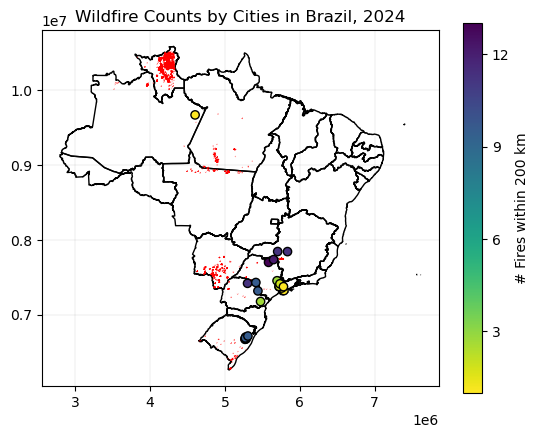

In [180]:
# Create figure and axis
fig,ax = plt.subplots()

# Add Brazil states layer, converted to same CRS as BR_cities_gdf and BR_WF_shp
BR_shp.to_crs('EPSG:5880').plot(facecolor='None',linewidth=1,ax=ax)

# Add the original wildfire data
BR_WF_shp.plot(facecolor='red',linewidth=1,edgecolor='red',ax=ax)

# Add the Brazil cities data, coloring each point by the number of fires
BR_cities_gdf.plot(column='no_fires',ax=ax,edgecolor='black',cmap='viridis_r')

# Customize colorbar
sm = plt.cm.ScalarMappable(cmap='viridis_r',norm=plt.Normalize(vmin=1,vmax=13))
cbar = fig.colorbar(sm)
cbar.ax.set_yticks([3,6,9,12])
cbar.ax.set_ylabel('# Fires within 200 km')

# Customize other axes settings
ax.set_title('Wildfire Counts within 200 km of Cities in Brazil, 2024')
ax.grid(visible=True,linewidth=0.1,color='gray')

# Course Evaluation: Please fill out [this quick eval!](https://forms.office.com/Pages/ResponsePage.aspx?id=lYdfxj26UUOKBwhl5djwkFtIujJ9lCFMouysTWFV3rRURFZHRjFZUVc2QTlJNzJDMUdUWjhXN1dPMi4u)